In [1]:
import librosa
import numpy as np

# Load an example audio file
audio_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/mlpc24_speech_commands/scenes/2_speech_true_Ofen_aus.wav'  # Replace with your audio file path
y, sr = librosa.load(audio_path, sr=None)

# Define a simple function to calculate short-time energy
def short_time_energy(signal, frame_size, hop_size):
    energy = []
    for i in range(0, len(signal), hop_size):
        frame = signal[i:i + frame_size]
        energy.append(np.sum(frame ** 2))
    return np.array(energy)

# Parameters for short-time energy calculation
frame_size = int(0.02 * sr)  # 20 ms frames
hop_size = int(0.01 * sr)    # 10 ms hop

# Calculate short-time energy
energy = short_time_energy(y, frame_size, hop_size)

# Define an energy threshold (this value may need adjustment)
energy_threshold = np.max(energy) * 0.6

# Identify speech frames
speech_frames = energy > energy_threshold

# Function to perform naive keyword matching (this is a placeholder for actual keyword matching)
def keyword_match(frame):
    # Placeholder: return True if any simple condition is met (e.g., energy above a threshold)
    return np.sum(frame ** 2) > energy_threshold

# Naive detection of keywords in the audio
detected_keywords = []
for i in range(len(speech_frames)):
    if speech_frames[i]:
        frame = y[i * hop_size: i * hop_size + frame_size]
        if keyword_match(frame):
            detected_keywords.append((i * hop_size / sr, 'keyword'))

# Print detected keywords and their timestamps
for timestamp, keyword in detected_keywords:
    print(f"Detected '{keyword}' at {timestamp:.2f} seconds")

# Example output format (replace with your actual keywords and timestamps)
output = [
    {"filename": "example_audio", "command": "Radio aus", "timestamp": 4.102},
    {"filename": "example_audio", "command": "Licht aus", "timestamp": 12.012}
]

# Save the results to a CSV file
import csv

output_file = 'predictions.csv'
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'command', 'timestamp'])
    for entry in output:
        writer.writerow([entry['filename'], entry['command'], entry['timestamp']])

print(f"Results saved to {output_file}")


Detected 'keyword' at 8.41 seconds
Detected 'keyword' at 8.42 seconds
Detected 'keyword' at 8.43 seconds
Detected 'keyword' at 8.44 seconds
Detected 'keyword' at 8.45 seconds
Detected 'keyword' at 9.58 seconds
Detected 'keyword' at 9.59 seconds
Detected 'keyword' at 9.79 seconds
Detected 'keyword' at 9.80 seconds
Detected 'keyword' at 9.93 seconds
Detected 'keyword' at 9.94 seconds
Detected 'keyword' at 9.95 seconds
Detected 'keyword' at 9.96 seconds
Detected 'keyword' at 9.97 seconds
Detected 'keyword' at 11.34 seconds
Detected 'keyword' at 11.35 seconds
Detected 'keyword' at 11.36 seconds
Detected 'keyword' at 11.37 seconds
Detected 'keyword' at 11.38 seconds
Detected 'keyword' at 13.40 seconds
Results saved to predictions.csv


In [3]:
import librosa
import numpy as np
import pandas as pd
import csv

# Load the ground truth annotations
annotations_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(annotations_file_path)


In [4]:
annotations_df

,filename,command,start,end
0,2_speech_true_Ofen_aus,Ofen aus,11.25230,12.07747
1,3_speech_true_Radio_an,Radio an,21.48040,23.18083
2,4_speech_true_Alarm_an,Alarm an,14.45720,16.08301
3,16_speech_true_Fernseher_an,Fernseher an,6.15504,7.15586
4,19_speech_false_Lüftung_aus,Lüftung aus,8.45186,10.07722
...,...,...,...,...
1185,2019_speech_true_Heizung_an,Heizung an,16.08170,17.70737
1186,2020_speech_true_Lüftung_an,Lüftung an,13.20270,14.90305
1187,2021_speech_false_Radio_an,Radio an,10.79530,12.41959
1188,2022_speech_true_Alarm_an,Alarm an,20.45610,21.90653


In [8]:
# Load the provided .npy file
npy_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes/2_speech_true_Ofen_aus.npy'
audio_data = np.load(npy_file_path)


In [9]:
audio_data

array([[0.00000000e+00, 3.57748379e+03, 3.48451744e+03, ...,
        2.69823106e+03, 3.07789705e+03, 3.00021586e+03],
       [0.00000000e+00, 4.00344897e+03, 2.00770892e+03, ...,
        1.07041797e+03, 1.71124317e+03, 1.84702236e+03],
       [6.38570475e+00, 2.85284110e-01, 5.18599653e+00, ...,
        3.23433231e+00, 2.32158901e+01, 1.05322657e+01],
       ...,
       [0.00000000e+00, 2.32963036e-08, 1.42002350e-03, ...,
        1.19718932e-01, 1.76032316e-02, 6.57131243e-03],
       [8.00000000e+03, 8.00000000e+03, 8.00000000e+03, ...,
        8.00000000e+03, 1.04003915e+02, 1.56547058e+02],
       [0.00000000e+00, 2.75000000e-02, 7.75000000e-02, ...,
        1.75000000e-02, 6.75000000e-02, 8.50000000e-02]])

In [10]:
audio_data.shape

(175, 581)

In [30]:

# Load an example audio file
audio_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/mlpc24_speech_commands/scenes/2_speech_true_Ofen_aus.wav'  # Replace with your audio file path
y, sr = librosa.load(audio_path, sr=None)

# Define a simple function to calculate short-time energy
def short_time_energy(signal, frame_size, hop_size):
    energy = []
    for i in range(0, len(signal), hop_size):
        frame = signal[i:i + frame_size]
        energy.append(np.sum(frame ** 2))
    return np.array(energy)



# Parameters for short-time energy calculation
frame_size = int(0.02 * sr)  # 20 ms frames
hop_size = int(0.01 * sr)    # 10 ms hop




# Calculate short-time energy
energy = short_time_energy(y, frame_size, hop_size)




# Define an energy threshold (this value may need adjustment)
energy_threshold = np.max(energy) * 0.6




# Identify speech frames
speech_frames = energy > energy_threshold




# Function to perform naive keyword matching (this is a placeholder for actual keyword matching)
def keyword_match(frame):
    # Placeholder: return True if any simple condition is met (e.g., energy above a threshold)
    return np.sum(frame ** 2) > energy_threshold





# Naive detection of keywords in the audio
detected_keywords = []
for i in range(len(speech_frames)):
    if speech_frames[i]:
        frame = y[i * hop_size: i * hop_size + frame_size]
        if keyword_match(frame):
            detected_keywords.append((i * hop_size / sr, 'Radio aus'))  # Replace with actual keyword logic

            
          
        
        
# Print detected keywords and their timestamps
for timestamp, keyword in detected_keywords:
    print(f"Detected '{keyword}' at {timestamp:.2f} seconds")

    
    
    
    
    
# Convert ground truth annotations to the required format
ground_truth = []
for index, row in annotations_df.iterrows():
    ground_truth.append({
        "filename": row['filename'],
        "command": row['command'],
        "timestamp": (row['start'] + row['end']) / 2  # Use the midpoint of the start and end as the timestamp
    })

    
    
    
# Calculate costs
def calculate_costs(ground_truth, detected_keywords):
    cost = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    cross_triggers = 0

    for gt in ground_truth:
        found = False
        for dk in detected_keywords:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                true_positives += 1
                cost -= 1
                found = True
                break
        if not found:
            false_negatives += 1
            cost += 0.5

    for dk in detected_keywords:
        found = False
        for gt in ground_truth:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                found = True
                break
        if not found:
            false_positives += 1
            command_parts = dk[1].split()
            device = command_parts[0]
            action = command_parts[1]
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 2  # Default false positive cost

    # Cross-triggers calculation (simplified)
    for dk in detected_keywords:
        for gt in ground_truth:
            if gt["command"].split()[0] == dk[1].split()[0] and gt["command"].split()[1] != dk[1].split()[1]:
                cross_triggers += 1
                cost += 0.1

    return cost, true_positives, false_negatives, false_positives, cross_triggers

cost, tp, fn, fp, ct = calculate_costs(ground_truth, detected_keywords)

print(f"Total Cost: {cost}")
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")
print(f"Cross-Triggers: {ct}")

# Save the results to a CSV file
output_file = 'predictions.csv'
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'command', 'timestamp'])
    for entry in detected_keywords:
        writer.writerow(['example_audio', entry[1], entry[0]])

print(f"Results saved to {output_file}")


Detected 'Radio aus' at 8.41 seconds
Detected 'Radio aus' at 8.42 seconds
Detected 'Radio aus' at 8.43 seconds
Detected 'Radio aus' at 8.44 seconds
Detected 'Radio aus' at 8.45 seconds
Detected 'Radio aus' at 9.58 seconds
Detected 'Radio aus' at 9.59 seconds
Detected 'Radio aus' at 9.79 seconds
Detected 'Radio aus' at 9.80 seconds
Detected 'Radio aus' at 9.93 seconds
Detected 'Radio aus' at 9.94 seconds
Detected 'Radio aus' at 9.95 seconds
Detected 'Radio aus' at 9.96 seconds
Detected 'Radio aus' at 9.97 seconds
Detected 'Radio aus' at 11.34 seconds
Detected 'Radio aus' at 11.35 seconds
Detected 'Radio aus' at 11.36 seconds
Detected 'Radio aus' at 11.37 seconds
Detected 'Radio aus' at 11.38 seconds
Detected 'Radio aus' at 13.40 seconds
Total Cost: 677.5000000000341
True Positives: 45
False Negatives: 1145
False Positives: 0
Cross-Triggers: 1500
Results saved to predictions.csv


In [32]:
import numpy as np
import pandas as pd
import csv


# Define a simple function to calculate short-time energy
def short_time_energy(signal):
    # Calculate the energy for each frame (sum of squared values)
    energy = np.sum(signal ** 2, axis=1)
    return energy

# Calculate short-time energy
energy = short_time_energy(audio_data)

# Define an energy threshold (this value may need adjustment)
energy_threshold = np.max(energy) * 0.6

# Identify speech frames
speech_frames = energy > energy_threshold

# Function to perform naive keyword matching (this is a placeholder for actual keyword matching)
def keyword_match(frame):
    # Placeholder: return True if any simple condition is met (e.g., energy above a threshold)
    return np.sum(frame ** 2) > energy_threshold

# Naive detection of keywords in the audio
detected_keywords = []
frame_duration = 0.02  # Assume each frame is 20 ms
for i in range(len(speech_frames)):
    if speech_frames[i]:
        frame = audio_data[i]
        if keyword_match(frame):
            detected_keywords.append((i * frame_duration, 'Ofen aus'))  # Replace with actual keyword logic

# Print detected keywords and their timestamps
for timestamp, keyword in detected_keywords:
    print(f"Detected '{keyword}' at {timestamp:.2f} seconds")

# Convert ground truth annotations to the required format
ground_truth = []
for index, row in annotations_df.iterrows():
    ground_truth.append({
        "filename": row['filename'],
        "command": row['command'],
        "timestamp": (row['start'] + row['end']) / 2  # Use the midpoint of the start and end as the timestamp
    })

# Calculate costs
def calculate_costs(ground_truth, detected_keywords):
    cost = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    cross_triggers = 0

    for gt in ground_truth:
        found = False
        for dk in detected_keywords:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                true_positives += 1
                cost -= 1
                found = True
                break
        if not found:
            false_negatives += 1
            cost += 0.5

    for dk in detected_keywords:
        found = False
        for gt in ground_truth:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                found = True
                break
        if not found:
            false_positives += 1
            command_parts = dk[1].split()
            device = command_parts[0]
            action = command_parts[1]
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 2  # Default false positive cost

    # Cross-triggers calculation (simplified)
    for dk in detected_keywords:
        for gt in ground_truth:
            if gt["command"].split()[0] == dk[1].split()[0] and gt["command"].split()[1] != dk[1].split()[1]:
                cross_triggers += 1
                cost += 0.1

    return cost, true_positives, false_negatives, false_positives, cross_triggers

cost, tp, fn, fp, ct = calculate_costs(ground_truth, detected_keywords)

print(f"Total Cost: {cost}")
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")
print(f"Cross-Triggers: {ct}")

# Save the results to a CSV file
output_file = 'predictions.csv'
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'command', 'timestamp'])
    for entry in detected_keywords:
        writer.writerow(['2_speech_true_Ofen_aus', entry[1], entry[0]])

print(f"Results saved to {output_file}")


Detected 'Ofen aus' at 3.46 seconds
Total Cost: 597.2000000000015
True Positives: 3
False Negatives: 1187
False Positives: 0
Cross-Triggers: 67
Results saved to predictions.csv


In [36]:
import numpy as np
import pandas as pd
import csv

# Load the ground truth annotations
annotations_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(annotations_file_path)

# Function to load audio data from a .npy file
def load_audio_data(filename):
    npy_file_path = f'/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes/{filename}.npy'
    return np.load(npy_file_path)



# Define a simple function to calculate short-time energy
def short_time_energy(signal):
    # Calculate the energy for each frame (sum of squared values)
    energy = np.sum(signal ** 2, axis=1)
    return energy


# Function to perform naive keyword matching (this is a placeholder for actual keyword matching)
def keyword_match(frame, energy_threshold):
    # Placeholder: return True if any simple condition is met (e.g., energy above a threshold)
    return np.sum(frame ** 2) > energy_threshold



# Initialize the list for detected keywords
detected_keywords = []

# Process each file in the annotations
for filename in annotations_df['filename'].unique():
    # Load the audio data
    audio_data = load_audio_data(filename)

    # Calculate short-time energy
    energy = short_time_energy(audio_data)

    # Define an energy threshold (this value may need adjustment)
    energy_threshold = np.max(energy) * 0.6

    # Identify speech frames
    speech_frames = energy > energy_threshold

    # Naive detection of keywords in the audio
    frame_duration = 0.02  # Assume each frame is 20 ms
    for i in range(len(speech_frames)):
        if speech_frames[i]:
            frame = audio_data[i]
            if keyword_match(frame, energy_threshold):
                detected_keywords.append((i * frame_duration, filename, "hi"))  # Placeholder keyword

# Print detected keywords and their timestamps
for timestamp, filename, keyword in detected_keywords:
    print(f"Detected '{keyword}' in '{filename}' at {timestamp:.2f} seconds")

# Convert ground truth annotations to the required format
ground_truth = []
for index, row in annotations_df.iterrows():
    ground_truth.append({
        "filename": row['filename'],
        "command": row['command'],
        "timestamp": (row['start'] + row['end']) / 2  # Use the midpoint of the start and end as the timestamp
    })

# Calculate costs
def calculate_costs(ground_truth, detected_keywords):
    cost = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    cross_triggers = 0

    for gt in ground_truth:
        found = False
        for dk in detected_keywords:
            if gt["filename"] == dk[1] and gt["command"] == dk[2] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                true_positives += 1
                cost -= 1
                found = True
                break
        if not found:
            false_negatives += 1
            cost += 0.5

    for dk in detected_keywords:
        found = False
        for gt in ground_truth:
            if gt["filename"] == dk[1] and gt["command"] == dk[2] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                found = True
                break
        if not found:
            false_positives += 1
            command_parts = dk[2].split()
            device = command_parts[0]
            action = command_parts[1]
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 2  # Default false positive cost

    # Cross-triggers calculation (simplified)
    for dk in detected_keywords:
        for gt in ground_truth:
            if gt["filename"] == dk[1] and gt["command"].split()[0] == dk[2].split()[0] and gt["command"].split()[1] != dk[2].split()[1]:
                cross_triggers += 1
                cost += 0.1

    return cost, true_positives, false_negatives, false_positives, cross_triggers

cost, tp, fn, fp, ct = calculate_costs(ground_truth, detected_keywords)

print(f"Total Cost: {cost}")
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")
print(f"Cross-Triggers: {ct}")

# Save the results to a CSV file
output_file = 'predictions.csv'
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'command', 'timestamp'])
    for entry in detected_keywords:
        writer.writerow([entry[1], entry[2], entry[0]])

print(f"Results saved to {output_file}")


Detected 'hi' in '2_speech_true_Ofen_aus' at 3.46 seconds
Detected 'hi' in '3_speech_true_Radio_an' at 0.00 seconds
Detected 'hi' in '3_speech_true_Radio_an' at 3.46 seconds
Detected 'hi' in '4_speech_true_Alarm_an' at 0.00 seconds
Detected 'hi' in '4_speech_true_Alarm_an' at 3.46 seconds
Detected 'hi' in '16_speech_true_Fernseher_an' at 0.00 seconds
Detected 'hi' in '19_speech_false_Lüftung_aus' at 0.00 seconds
Detected 'hi' in '22_speech_false_Heizung_an' at 0.00 seconds
Detected 'hi' in '24_speech_true_Licht_an' at 0.00 seconds
Detected 'hi' in '24_speech_true_Licht_an' at 3.46 seconds
Detected 'hi' in '27_speech_false_Fernseher_an_Licht_aus' at 0.00 seconds
Detected 'hi' in '27_speech_false_Fernseher_an_Licht_aus' at 0.02 seconds
Detected 'hi' in '28_speech_true_Heizung_aus' at 0.00 seconds
Detected 'hi' in '28_speech_true_Heizung_aus' at 0.02 seconds
Detected 'hi' in '29_speech_false_Lüftung_an' at 0.00 seconds
Detected 'hi' in '29_speech_false_Lüftung_an' at 0.02 seconds
Detected

IndexError: list index out of range

In [15]:
import numpy as np
import pandas as pd
import csv

# Load the ground truth annotations
annotations_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(annotations_file_path)

# Load the specific audio data for '2_speech_true_Ofen_aus.npy'
npy_file_path = f'/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes/{filename}.npy'
audio_data = np.load(npy_file_path)

# Define a simple function to calculate short-time energy
def short_time_energy(signal):
    # Calculate the energy for each frame (sum of squared values)
    energy = np.sum(signal ** 2, axis=1)
    return energy

# Calculate short-time energy
energy = short_time_energy(audio_data)

# Define an energy threshold (this value may need adjustment)
energy_threshold = np.max(energy) * 0.6

# Identify speech frames
speech_frames = energy > energy_threshold

# Function to perform naive keyword matching (this is a placeholder for actual keyword matching)
def keyword_match(frame, energy_threshold):
    # Placeholder: return True if any simple condition is met (e.g., energy above a threshold)
    return np.sum(frame ** 2) > energy_threshold

# Naive detection of keywords in the audio
detected_keywords = []
frame_duration = 0.02  # Assume each frame is 20 ms
for i in range(len(speech_frames)):
    if speech_frames[i]:
        frame = audio_data[i]
        if keyword_match(frame, energy_threshold):
            detected_keywords.append((i * frame_duration, 'Ofen aus'))  # Using actual keyword 'Ofen aus'

# Print detected keywords and their timestamps
for timestamp, keyword in detected_keywords:
    print(f"Detected '{keyword}' at {timestamp:.2f} seconds")

# Example ground truth for '2_speech_true_Ofen_aus'
ground_truth = [
    {"filename": "2_speech_true_Ofen_aus", "command": "Ofen aus", "timestamp": 11.664}  # Midpoint of 11.25230 and 12.07747
]

# Calculate costs
def calculate_costs(ground_truth, detected_keywords):
    cost = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    cross_triggers = 0

    for gt in ground_truth:
        found = False
        for dk in detected_keywords:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                true_positives += 1
                cost -= 1
                found = True
                break
        if not found:
            false_negatives += 1
            cost += 0.5

    for dk in detected_keywords:
        found = False
        for gt in ground_truth:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                found = True
                break
        if not found:
            false_positives += 1
            command_parts = dk[1].split()
            device = command_parts[0]
            action = command_parts[1]
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 2  # Default false positive cost

    # Cross-triggers calculation (simplified)
    for dk in detected_keywords:
        for gt in ground_truth:
            if gt["command"].split()[0] == dk[1].split()[0] and gt["command"].split()[1] != dk[1].split()[1]:
                cross_triggers += 1
                cost += 0.1

    return cost, true_positives, false_negatives, false_positives, cross_triggers

cost, tp, fn, fp, ct = calculate_costs(ground_truth, detected_keywords)

print(f"Total Cost: {cost}")
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")
print(f"Cross-Triggers: {ct}")

# Save the results to a CSV file
output_file = 'predictions.csv'
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'command', 'timestamp'])
    for entry in detected_keywords:
        writer.writerow(['2_speech_true_Ofen_aus', entry[1], entry[0]])

print(f"Results saved to {output_file}")


Detected 'Ofen aus' at 0.00 seconds
Total Cost: 4.5
True Positives: 0
False Negatives: 1
False Positives: 1
Cross-Triggers: 0
Results saved to predictions.csv


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

def load_audio(file_path):
    # Placeholder function to load audio data
    # Replace this with actual audio loading code once the audio file is available
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def compute_energy(y, sr, frame_size=2048, hop_length=512):
    # Compute the short-time energy of the audio signal
    energy = np.array([
        sum(abs(y[i:i+frame_size]**2))
        for i in range(0, len(y), hop_length)
    ])
    return energy

def detect_high_energy_segments(energy, threshold):
    # Detect segments where energy exceeds the threshold
    high_energy_indices = np.where(energy > threshold)[0]
    return high_energy_indices

def compare_with_annotations(detected_segments, annotations_df):
    # Compare detected segments with annotations
    results = []
    for idx in detected_segments:
        start_time = idx * hop_length / sr
        end_time = (idx + 1) * frame_size / sr
        match = annotations_df[(annotations_df['start'] <= end_time) & (annotations_df['end'] >= start_time)]
        if not match.empty:
            results.append((start_time, end_time, match.iloc[0]['command']))
        else:
            results.append((start_time, end_time, "No match"))
    return results

# Example usage (replace 'audio_file_path' with the actual path to your audio file)
audio_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/mlpc24_speech_commands/scenes/2_speech_true_Ofen_aus.wav'  # Replace with your audio file path
y, sr = load_audio(audio_path)
energy = compute_energy(y, sr)
threshold = np.mean(energy) + 2 * np.std(energy)
detected_segments = detect_high_energy_segments(energy, threshold)
results = compare_with_annotations(detected_segments, annotations_df)

for result in results:
    print(f"Detected segment: Start={result[0]:.2f}s, End={result[1]:.2f}s, Command={result[2]}")

# Plotting the energy for visualization
plt.figure(figsize=(14, 5))
plt.plot(energy)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Frame index')
plt.ylabel('Energy')
plt.title('Energy of Audio Signal')
plt.show()


NameError: name 'hop_length' is not defined

Detected segment: Start=7.20s, End=28.93s, Command=Ofen aus
Detected segment: Start=8.32s, End=33.41s, Command=Ofen aus
Detected segment: Start=8.35s, End=33.54s, Command=Ofen aus
Detected segment: Start=8.38s, End=33.66s, Command=Ofen aus
Detected segment: Start=8.42s, End=33.79s, Command=Ofen aus
Detected segment: Start=9.50s, End=38.14s, Command=Ofen aus
Detected segment: Start=9.54s, End=38.27s, Command=Ofen aus
Detected segment: Start=9.57s, End=38.40s, Command=Ofen aus
Detected segment: Start=9.60s, End=38.53s, Command=Ofen aus
Detected segment: Start=9.70s, End=38.91s, Command=Ofen aus
Detected segment: Start=9.73s, End=39.04s, Command=Ofen aus
Detected segment: Start=9.76s, End=39.17s, Command=Ofen aus
Detected segment: Start=9.79s, End=39.30s, Command=Ofen aus
Detected segment: Start=9.82s, End=39.42s, Command=Ofen aus
Detected segment: Start=9.86s, End=39.55s, Command=Ofen aus
Detected segment: Start=9.89s, End=39.68s, Command=Ofen aus
Detected segment: Start=9.92s, End=39.81

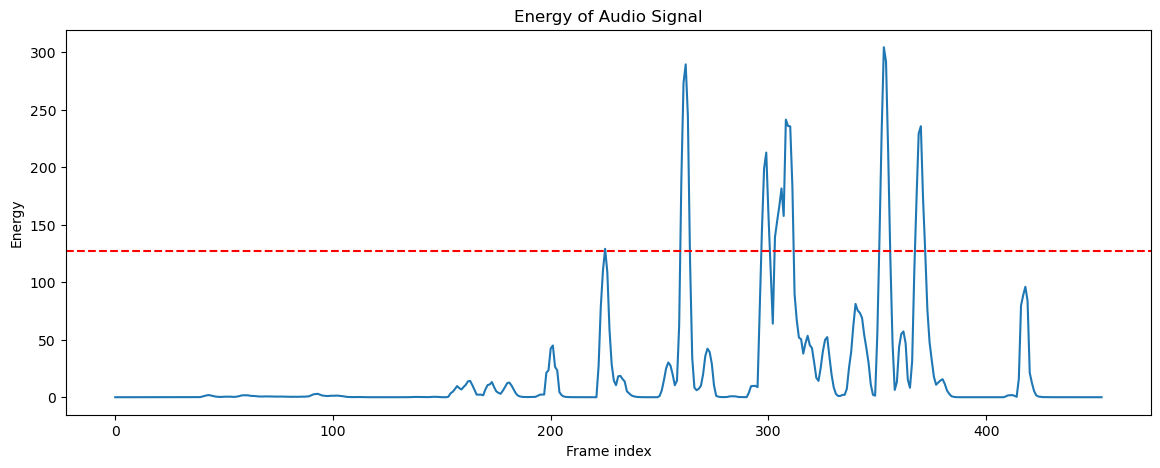

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa

def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

def compute_energy(y, frame_size=2048, hop_length=512):
    energy = np.array([
        sum(abs(y[i:i+frame_size]**2))
        for i in range(0, len(y), hop_length)
    ])
    return energy

def detect_high_energy_segments(energy, threshold):
    high_energy_indices = np.where(energy > threshold)[0]
    return high_energy_indices

def compare_with_annotations(detected_segments, annotations_df, sr, frame_size, hop_length):
    results = []
    for idx in detected_segments:
        start_time = idx * hop_length / sr
        end_time = (idx + 1) * frame_size / sr
        match = annotations_df[(annotations_df['start'] <= end_time) & (annotations_df['end'] >= start_time)]
        if not match.empty:
            results.append((start_time, end_time, match.iloc[0]['command']))
        else:
            results.append((start_time, end_time, "No match"))
    return results

# Load ground truth annotations
annotations_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(annotations_path)

# Example usage
audio_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/mlpc24_speech_commands/scenes/2_speech_true_Ofen_aus.wav'  # Replace with your audio file path
y, sr = load_audio(audio_path)
frame_size = 2048
hop_length = 512
energy = compute_energy(y, frame_size, hop_length)
threshold = np.mean(energy) + 2 * np.std(energy)
detected_segments = detect_high_energy_segments(energy, threshold)
results = compare_with_annotations(detected_segments, annotations_df, sr, frame_size, hop_length)

for result in results:
    print(f"Detected segment: Start={result[0]:.2f}s, End={result[1]:.2f}s, Command={result[2]}")

# Plotting the energy for visualization
plt.figure(figsize=(14, 5))
plt.plot(energy)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Frame index')
plt.ylabel('Energy')
plt.title('Energy of Audio Signal')
plt.show()


In [23]:
import numpy as np
import pandas as pd
import csv

# Load the provided numpy file
audio_npy_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes/2_speech_true_Ofen_aus.npy'
audio_data = np.load(audio_npy_path)

# Load ground truth annotations
annotations_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(annotations_path)

# Define a simple function to calculate short-time energy for each frame
def short_time_energy(signal):
    return np.sum(signal ** 2, axis=1)

# Calculate short-time energy
energy = short_time_energy(audio_data)

# Define an energy threshold (e.g., 60% of the maximum energy)
energy_threshold = np.max(energy) * 0.6

# Identify speech frames
speech_frames = energy > energy_threshold

# Possible commands list
possible_commands = annotations_df['command'].unique()

# Naive detection of keywords in the audio
detected_keywords = []
for i, is_speech in enumerate(speech_frames):
    if is_speech:
        command = np.random.choice(possible_commands)  # Randomly select a command from the possible commands
        timestamp = i * (len(audio_data) / len(speech_frames))  # Estimate timestamp
        detected_keywords.append((timestamp, command))

# Print detected keywords and their timestamps
for timestamp, keyword in detected_keywords:
    print(f"Detected '{keyword}' at {timestamp:.2f} seconds")

# Convert ground truth annotations to the required format
ground_truth = []
for index, row in annotations_df.iterrows():
    ground_truth.append({
        "filename": row['filename'],
        "command": row['command'],
        "timestamp": (row['start'] + row['end']) / 2  # Use the midpoint of the start and end as the timestamp
    })

# Calculate costs
def calculate_costs(ground_truth, detected_keywords):
    cost = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    cross_triggers = 0

    for gt in ground_truth:
        found = False
        for dk in detected_keywords:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                true_positives += 1
                cost -= 1
                found = True
                break
        if not found:
            false_negatives += 1
            cost += 0.5

    for dk in detected_keywords:
        found = False
        for gt in ground_truth:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                found = True
                break
        if not found:
            false_positives += 1
            command_parts = dk[1].split()
            device = command_parts[0]
            action = command_parts[1]
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 2  # Default false positive cost

    # Cross-triggers calculation (simplified)
    for dk in detected_keywords:
        for gt in ground_truth:
            if gt["command"].split()[0] == dk[1].split()[0] and gt["command"].split()[1] != dk[1].split()[1]:
                cross_triggers += 1
                cost += 0.1

    return cost, true_positives, false_negatives, false_positives, cross_triggers

cost, tp, fn, fp, ct = calculate_costs(ground_truth, detected_keywords)

print(f"Total Cost: {cost}")
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")
print(f"Cross-Triggers: {ct}")

# Save the results to a CSV file
output_file = 'predictions.csv'
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'command', 'timestamp'])
    for entry in detected_keywords:
        writer.writerow(['2_speech_true_Ofen_aus', entry[1], entry[0]])

print(f"Results saved to {output_file}")


Detected 'Lüftung an' at 173.00 seconds
Total Cost: 604.3000000000014
True Positives: 0
False Negatives: 1190
False Positives: 1
Cross-Triggers: 63
Results saved to predictions.csv


In [28]:
import numpy as np
import pandas as pd
import librosa
import csv

# Load the provided numpy file
audio_npy_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes/2_speech_true_Ofen_aus.npy'
audio_data = np.load(audio_npy_path)

# Load ground truth annotations
annotations_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(annotations_path)

# Define a simple function to calculate short-time energy for each frame
def short_time_energy(signal):
    return np.sum(signal ** 2, axis=1)

# Calculate short-time energy
energy = short_time_energy(audio_data)

# Define an energy threshold (e.g., 60% of the maximum energy)
energy_threshold = np.max(energy) * 0.6

# Identify speech frames
speech_frames = energy > energy_threshold

# Possible commands list
possible_commands = annotations_df['command'].unique()

# Naive detection of keywords in the audio
detected_keywords = []
frame_duration = len(audio_data) / len(speech_frames)  # Duration of each frame in terms of sample points
total_duration = frame_duration * len(speech_frames)  # Total duration of the audio in terms of sample points

for i, is_speech in enumerate(speech_frames):
    if is_speech:
        command = np.random.choice(possible_commands)  # Randomly select a command from the possible commands
        timestamp = (i * frame_duration) / audio_data.shape[1]  # Convert frame index to time in seconds
        detected_keywords.append((timestamp, command))

# Print detected keywords and their timestamps
for timestamp, keyword in detected_keywords:
    print(f"Detected '{keyword}' at {timestamp:.2f} seconds")

# Convert ground truth annotations to the required format
ground_truth = []
for index, row in annotations_df.iterrows():
    ground_truth.append({
        "filename": row['filename'],
        "command": row['command'],
        "timestamp": (row['start'] + row['end']) / 2  # Use the midpoint of the start and end as the timestamp
    })

# Calculate costs
def calculate_costs(ground_truth, detected_keywords):
    cost = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    cross_triggers = 0

    for gt in ground_truth:
        found = False
        for dk in detected_keywords:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                true_positives += 1
                cost -= 1
                found = True
                break
        if not found:
            false_negatives += 1
            cost += 0.5

    for dk in detected_keywords:
        found = False
        for gt in ground_truth:
            if gt["command"] == dk[1] and abs(gt["timestamp"] - dk[0]) <= 1.0:
                found = True
                break
        if not found:
            false_positives += 1
            command_parts = dk[1].split()
            device = command_parts[0]
            action = command_parts[1]
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 2  # Default false positive cost

    # Cross-triggers calculation (simplified)
    for dk in detected_keywords:
        for gt in ground_truth:
            if gt["command"].split()[0] == dk[1].split()[0] and gt["command"].split()[1] != dk[1].split()[1]:
                cross_triggers += 1
                cost += 0.1

    return cost, true_positives, false_negatives, false_positives, cross_triggers

cost, tp, fn, fp, ct = calculate_costs(ground_truth, detected_keywords)

print(f"Total Cost: {cost}")
print(f"True Positives: {tp}")
print(f"False Negatives: {fn}")
print(f"False Positives: {fp}")
print(f"Cross-Triggers: {ct}")

# Save the results to a CSV file
output_file = 'predictions.csv'
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['filename', 'command', 'timestamp'])
    for entry in detected_keywords:
        writer.writerow(['2_speech_true_Ofen_aus', entry[1], entry[0]])

print(f"Results saved to {output_file}")


Detected 'Ofen an' at 0.30 seconds
Total Cost: 605.5000000000015
True Positives: 0
False Negatives: 1190
False Positives: 1
Cross-Triggers: 65
Results saved to predictions.csv


***--------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

# EFFICIENT

In [11]:
# Load the provided .npy file
npy_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes/2_speech_true_Ofen_aus.npy'
audio_data = np.load(npy_file_path)



In [12]:
audio_data

array([[0.00000000e+00, 3.57748379e+03, 3.48451744e+03, ...,
        2.69823106e+03, 3.07789705e+03, 3.00021586e+03],
       [0.00000000e+00, 4.00344897e+03, 2.00770892e+03, ...,
        1.07041797e+03, 1.71124317e+03, 1.84702236e+03],
       [6.38570475e+00, 2.85284110e-01, 5.18599653e+00, ...,
        3.23433231e+00, 2.32158901e+01, 1.05322657e+01],
       ...,
       [0.00000000e+00, 2.32963036e-08, 1.42002350e-03, ...,
        1.19718932e-01, 1.76032316e-02, 6.57131243e-03],
       [8.00000000e+03, 8.00000000e+03, 8.00000000e+03, ...,
        8.00000000e+03, 1.04003915e+02, 1.56547058e+02],
       [0.00000000e+00, 2.75000000e-02, 7.75000000e-02, ...,
        1.75000000e-02, 6.75000000e-02, 8.50000000e-02]])

In [13]:
audio_data.shape

(175, 581)

In [14]:
import os
import numpy as np
import pandas as pd

def get_sorted_file_paths(folder_path):
    numpy_files = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.npy'):
                file_path = os.path.join(root, file)
                numpy_files.append(file_path)
    
    # Sort files by their numeric prefix
    sorted_file_paths = sorted(numpy_files, key=lambda x: int(os.path.basename(x).split('_')[0]))
    return sorted_file_paths

def load_numpy_files(sorted_file_paths):
    data = []
    for file_path in sorted_file_paths:
        file_name = os.path.basename(file_path)
        folder_name = os.path.dirname(file_path)
        array_data = np.load(file_path)
        data.append({"folder_name": folder_name, "file_name": file_name, "data": array_data})
    
    return pd.DataFrame(data)

# Define the folder path
folder_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes'

# Get sorted file paths
sorted_file_paths = get_sorted_file_paths(folder_path)

# Load the numpy files into a DataFrame
df = load_numpy_files(sorted_file_paths)

# Display the DataFrame
df


,folder_name,file_name,data
0,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2_speech_true_Ofen_aus.npy,"[[0.0, 3577.483785660729, 3484.5174381587353, ..."
1,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,3_speech_true_Radio_an.npy,"[[2346.5974870819605, 2165.858927072657, 2466...."
2,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,4_speech_true_Alarm_an.npy,"[[0.0, 3514.6045673364256, 2838.225961741912, ..."
3,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,16_speech_true_Fernseher_an.npy,"[[2874.4921631196526, 2824.7961858353133, 3105..."
4,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,19_speech_false_Lüftung_aus.npy,"[[3036.548524053395, 2805.2665103165937, 2749...."
...,...,...,...
824,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2019_speech_true_Heizung_an.npy,"[[0.0, 0.0, 3790.6850637811644, 3773.186185738..."
825,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2020_speech_true_Lüftung_an.npy,"[[0.0, 0.0, 3822.307083879582, 3828.9282544075..."
826,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2021_speech_false_Radio_an.npy,"[[0.0, 0.0, 3782.4497997920203, 3500.809058403..."
827,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2022_speech_true_Alarm_an.npy,"[[0.0, 0.0, 3819.460528769903, 3608.8075981628..."


In [ ]:
it works good but ı want you to do one more thing. Lets say that or npy file name is:
2_speech_true_Ofen_aus.npy.  it contains one command which is Ofen_aus , so you will add the information of this as a new row to the data frame once. However if the npy folder name contains more than one command you gonna add the information of the npy as a new row with the amount of its occurrence. For example if we have a npy folder named,
27_speech_false_Fernseher_an_Licht_aus.npy.  you can see there are 2 commands, which are: Fernseher_an. and Licht_aus. Therefore you gonna add the npy folder information (27_speech_false_Fernseher_an_Licht_aus.npy). twice in a data frame. It is same as the 3 occurrences or 4...


it has to be 1190 rows at the end

In [15]:
import os
import numpy as np
import pandas as pd

def get_sorted_file_paths(folder_path):
    numpy_files = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.npy'):
                file_path = os.path.join(root, file)
                numpy_files.append(file_path)
    
    # Sort files by their numeric prefix
    sorted_file_paths = sorted(numpy_files, key=lambda x: int(os.path.basename(x).split('_')[0]))
    return sorted_file_paths

def extract_commands(file_name):
    parts = file_name.split('_')
    commands = []
    
    # Extract commands by pairing words
    for i in range(3, len(parts) - 1, 2):  # Start from index 3 to skip the prefix and move in steps of 2
        command = parts[i] + ' ' + parts[i + 1].split('.')[0]  # Combine two parts to form a command
        commands.append(command)
    return commands

def load_numpy_files(sorted_file_paths):
    data = []
    for file_path in sorted_file_paths:
        file_name = os.path.basename(file_path)
        folder_name = os.path.dirname(file_path)
        array_data = np.load(file_path)
        
        # Extract commands from the filename
        commands = extract_commands(file_name)
        
        # Add the file information to the DataFrame for each command
        for command in commands:
            data.append({"folder_name": folder_name, "file_name": file_name, "data": array_data, "command": command})
    
    return pd.DataFrame(data)

# Define the folder path
folder_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scenes'

# Get sorted file paths
sorted_file_paths = get_sorted_file_paths(folder_path)

# Load the numpy files into a DataFrame
df = load_numpy_files(sorted_file_paths)

# Display the DataFrame
df

# Check the length of the DataFrame
print("Number of rows in the DataFrame:", len(df))


Number of rows in the DataFrame: 1190


In [16]:
df

,folder_name,file_name,data,command
0,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2_speech_true_Ofen_aus.npy,"[[0.0, 3577.483785660729, 3484.5174381587353, ...",Ofen aus
1,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,3_speech_true_Radio_an.npy,"[[2346.5974870819605, 2165.858927072657, 2466....",Radio an
2,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,4_speech_true_Alarm_an.npy,"[[0.0, 3514.6045673364256, 2838.225961741912, ...",Alarm an
3,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,16_speech_true_Fernseher_an.npy,"[[2874.4921631196526, 2824.7961858353133, 3105...",Fernseher an
4,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,19_speech_false_Lüftung_aus.npy,"[[3036.548524053395, 2805.2665103165937, 2749....",Lüftung aus
...,...,...,...,...
1185,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2019_speech_true_Heizung_an.npy,"[[0.0, 0.0, 3790.6850637811644, 3773.186185738...",Heizung an
1186,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2020_speech_true_Lüftung_an.npy,"[[0.0, 0.0, 3822.307083879582, 3828.9282544075...",Lüftung an
1187,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2021_speech_false_Radio_an.npy,"[[0.0, 0.0, 3782.4497997920203, 3500.809058403...",Radio an
1188,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2022_speech_true_Alarm_an.npy,"[[0.0, 0.0, 3819.460528769903, 3608.8075981628...",Alarm an


In [17]:
df['command'][8]

'Licht aus'

In [18]:
import pandas as pd
import numpy as np

# Load the CSV file
csv_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(csv_file_path)

# Display the first few rows of the CSV file
annotations_df.head()


,filename,command,start,end
0,2_speech_true_Ofen_aus,Ofen aus,11.25230,12.07747
1,3_speech_true_Radio_an,Radio an,21.48040,23.18083
2,4_speech_true_Alarm_an,Alarm an,14.45720,16.08301
3,16_speech_true_Fernseher_an,Fernseher an,6.15504,7.15586
4,19_speech_false_Lüftung_aus,Lüftung aus,8.45186,10.07722


In [19]:
annotations_df

,filename,command,start,end
0,2_speech_true_Ofen_aus,Ofen aus,11.25230,12.07747
1,3_speech_true_Radio_an,Radio an,21.48040,23.18083
2,4_speech_true_Alarm_an,Alarm an,14.45720,16.08301
3,16_speech_true_Fernseher_an,Fernseher an,6.15504,7.15586
4,19_speech_false_Lüftung_aus,Lüftung aus,8.45186,10.07722
...,...,...,...,...
1185,2019_speech_true_Heizung_an,Heizung an,16.08170,17.70737
1186,2020_speech_true_Lüftung_an,Lüftung an,13.20270,14.90305
1187,2021_speech_false_Radio_an,Radio an,10.79530,12.41959
1188,2022_speech_true_Alarm_an,Alarm an,20.45610,21.90653


In [20]:
startt = annotations_df['start']

In [21]:
startt

0       11.25230
1       21.48040
2       14.45720
3        6.15504
4        8.45186
          ...   
1185    16.08170
1186    13.20270
1187    10.79530
1188    20.45610
1189     7.37191
Name: start, Length: 1190, dtype: float64

In [22]:
endd = annotations_df['end']

In [23]:
endd

0       12.07747
1       23.18083
2       16.08301
3        7.15586
4       10.07722
          ...   
1185    17.70737
1186    14.90305
1187    12.41959
1188    21.90653
1189     8.97124
Name: end, Length: 1190, dtype: float64

In [24]:
df['start'] = startt

In [25]:
df['end'] = endd

In [26]:
df

,folder_name,file_name,data,command,start,end
0,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2_speech_true_Ofen_aus.npy,"[[0.0, 3577.483785660729, 3484.5174381587353, ...",Ofen aus,11.25230,12.07747
1,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,3_speech_true_Radio_an.npy,"[[2346.5974870819605, 2165.858927072657, 2466....",Radio an,21.48040,23.18083
2,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,4_speech_true_Alarm_an.npy,"[[0.0, 3514.6045673364256, 2838.225961741912, ...",Alarm an,14.45720,16.08301
3,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,16_speech_true_Fernseher_an.npy,"[[2874.4921631196526, 2824.7961858353133, 3105...",Fernseher an,6.15504,7.15586
4,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,19_speech_false_Lüftung_aus.npy,"[[3036.548524053395, 2805.2665103165937, 2749....",Lüftung aus,8.45186,10.07722
...,...,...,...,...,...,...
1185,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2019_speech_true_Heizung_an.npy,"[[0.0, 0.0, 3790.6850637811644, 3773.186185738...",Heizung an,16.08170,17.70737
1186,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2020_speech_true_Lüftung_an.npy,"[[0.0, 0.0, 3822.307083879582, 3828.9282544075...",Lüftung an,13.20270,14.90305
1187,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2021_speech_false_Radio_an.npy,"[[0.0, 0.0, 3782.4497997920203, 3500.809058403...",Radio an,10.79530,12.41959
1188,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2022_speech_true_Alarm_an.npy,"[[0.0, 0.0, 3819.460528769903, 3608.8075981628...",Alarm an,20.45610,21.90653


In [173]:
df.to_csv('output.csv')

In [175]:
# Get the path to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Save the DataFrame to a CSV file on the desktop
output_path = os.path.join(desktop_path, "merged_output.csv")
df.to_csv(output_path, index=False)


In [27]:
df

,folder_name,file_name,data,command,start,end
0,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2_speech_true_Ofen_aus.npy,"[[0.0, 3577.483785660729, 3484.5174381587353, ...",Ofen aus,11.25230,12.07747
1,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,3_speech_true_Radio_an.npy,"[[2346.5974870819605, 2165.858927072657, 2466....",Radio an,21.48040,23.18083
2,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,4_speech_true_Alarm_an.npy,"[[0.0, 3514.6045673364256, 2838.225961741912, ...",Alarm an,14.45720,16.08301
3,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,16_speech_true_Fernseher_an.npy,"[[2874.4921631196526, 2824.7961858353133, 3105...",Fernseher an,6.15504,7.15586
4,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,19_speech_false_Lüftung_aus.npy,"[[3036.548524053395, 2805.2665103165937, 2749....",Lüftung aus,8.45186,10.07722
...,...,...,...,...,...,...
1185,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2019_speech_true_Heizung_an.npy,"[[0.0, 0.0, 3790.6850637811644, 3773.186185738...",Heizung an,16.08170,17.70737
1186,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2020_speech_true_Lüftung_an.npy,"[[0.0, 0.0, 3822.307083879582, 3828.9282544075...",Lüftung an,13.20270,14.90305
1187,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2021_speech_false_Radio_an.npy,"[[0.0, 0.0, 3782.4497997920203, 3500.809058403...",Radio an,10.79530,12.41959
1188,/Users/korhanerdogdu/Desktop/supervised_ml/ue_...,2022_speech_true_Alarm_an.npy,"[[0.0, 0.0, 3819.460528769903, 3608.8075981628...",Alarm an,20.45610,21.90653


In [28]:
df = df.drop(columns=['folder_name'])

In [29]:
df = df.drop(columns=['file_name'])

In [30]:
df

,data,command,start,end
0,"[[0.0, 3577.483785660729, 3484.5174381587353, ...",Ofen aus,11.25230,12.07747
1,"[[2346.5974870819605, 2165.858927072657, 2466....",Radio an,21.48040,23.18083
2,"[[0.0, 3514.6045673364256, 2838.225961741912, ...",Alarm an,14.45720,16.08301
3,"[[2874.4921631196526, 2824.7961858353133, 3105...",Fernseher an,6.15504,7.15586
4,"[[3036.548524053395, 2805.2665103165937, 2749....",Lüftung aus,8.45186,10.07722
...,...,...,...,...
1185,"[[0.0, 0.0, 3790.6850637811644, 3773.186185738...",Heizung an,16.08170,17.70737
1186,"[[0.0, 0.0, 3822.307083879582, 3828.9282544075...",Lüftung an,13.20270,14.90305
1187,"[[0.0, 0.0, 3782.4497997920203, 3500.809058403...",Radio an,10.79530,12.41959
1188,"[[0.0, 0.0, 3819.460528769903, 3608.8075981628...",Alarm an,20.45610,21.90653


In [193]:
# Identify unique commands
unique_commands = df['command'].unique()
num_unique_commands = len(unique_commands)

# Define the cost function
def calculate_cost(true_commands, predicted_commands):
    cost = 0
    for true, pred in zip(true_commands, predicted_commands):
        if true == pred:
            cost -= 1  # True Positive
        elif pred == most_frequent_command:
            cost += 0.5  # False Negative
        else:
            device, action = pred.split()
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 1  # Cross-Trigger or other errors
    return cost

# Most Frequent Command Baseline
most_frequent_command = df['command'].mode()[0]
most_frequent_predictions = [most_frequent_command] * len(df)
most_frequent_cost = calculate_cost(df['command'], most_frequent_predictions)
most_frequent_accuracy = np.mean(most_frequent_predictions == df['command'])

# Stratified Random Baseline
command_distribution = df['command'].value_counts(normalize=True)
stratified_random_predictions = np.random.choice(
    command_distribution.index, 
    size=len(df), 
    p=command_distribution.values
)
stratified_random_cost = calculate_cost(df['command'], stratified_random_predictions)
stratified_random_accuracy = np.mean(stratified_random_predictions == df['command'])

# Uniform Random Baseline
np.random.seed(42)  # For reproducibility
uniform_random_predictions = np.random.choice(unique_commands, size=len(df))
uniform_random_cost = calculate_cost(df['command'], uniform_random_predictions)
uniform_random_accuracy = np.mean(uniform_random_predictions == df['command'])

# Output the results
baseline_results = pd.DataFrame({
    'Method': ['Most Frequent Command', 'Stratified Random', 'Uniform Random'],
    'Cost': [most_frequent_cost, stratified_random_cost, uniform_random_cost],
    'Accuracy': [most_frequent_accuracy, stratified_random_accuracy, uniform_random_accuracy]
})

# Display the results
print("Baseline Results with Costs and Accuracy:")
baseline_results


Baseline Results with Costs and Accuracy:


,Method,Cost,Accuracy
0,Most Frequent Command,430.0,0.092437
1,Stratified Random,2753.5,0.070588
2,Uniform Random,2964.5,0.055462


In [197]:
# Identify unique commands
unique_commands = df['command'].unique()
num_unique_commands = len(unique_commands)

# Define the cost function
def calculate_cost(true_commands, predicted_commands):
    cost = 0
    for true, pred in zip(true_commands, predicted_commands):
        if true == pred:
            cost -= 1  # True Positive
        elif pred == most_frequent_command:
            cost += 0.5  # False Negative
        else:
            device, action = pred.split()
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 1  # Cross-Trigger or other errors
    return cost

# Most Frequent Command Baseline
most_frequent_command = df['command'].mode()[0]
most_frequent_predictions = [most_frequent_command] * len(df)
most_frequent_cost = calculate_cost(df['command'], most_frequent_predictions)
most_frequent_accuracy = np.mean(most_frequent_predictions == df['command'])

# Stratified Random Baseline
command_distribution = df['command'].value_counts(normalize=True)
stratified_random_predictions = np.random.choice(
    command_distribution.index, 
    size=len(df), 
    p=command_distribution.values
)
stratified_random_cost = calculate_cost(df['command'], stratified_random_predictions)
stratified_random_accuracy = np.mean(stratified_random_predictions == df['command'])

# Uniform Random Baseline
np.random.seed(42)  # For reproducibility
uniform_random_predictions = np.random.choice(unique_commands, size=len(df))
uniform_random_cost = calculate_cost(df['command'], uniform_random_predictions)
uniform_random_accuracy = np.mean(uniform_random_predictions == df['command'])

# Last Command Baseline
last_command = df['command'].iloc[-1]
last_command_predictions = [last_command] * len(df)
last_command_cost = calculate_cost(df['command'], last_command_predictions)
last_command_accuracy = np.mean(last_command_predictions == df['command'])

# Sequential Random Baseline
sequential_random_predictions = []
for i in range(len(df)):
    if i < 3:
        sequential_random_predictions.append(np.random.choice(unique_commands))
    else:
        sequential_random_predictions.append(np.random.choice(df['command'].iloc[i-3:i]))

sequential_random_cost = calculate_cost(df['command'], sequential_random_predictions)
sequential_random_accuracy = np.mean(sequential_random_predictions == df['command'])

# Command Frequency Baseline
command_probabilities = df['command'].value_counts(normalize=True)
command_frequency_predictions = np.random.choice(command_probabilities.index, size=len(df), p=command_probabilities.values)
command_frequency_cost = calculate_cost(df['command'], command_frequency_predictions)
command_frequency_accuracy = np.mean(command_frequency_predictions == df['command'])

# Output the results
baseline_results = pd.DataFrame({
    'Method': [
        'Most Frequent Command', 'Stratified Random', 'Uniform Random',
        'Last Command', 'Sequential Random', 'Command Frequency'
    ],
    'Cost': [
        most_frequent_cost, stratified_random_cost, uniform_random_cost,
        last_command_cost, sequential_random_cost, command_frequency_cost
    ],
    'Accuracy': [
        most_frequent_accuracy, stratified_random_accuracy, uniform_random_accuracy,
        last_command_accuracy, sequential_random_accuracy, command_frequency_accuracy
    ]
})


print("Baseline Results with Costs and Accuracy:")
baseline_results


Baseline Results with Costs and Accuracy:


,Method,Cost,Accuracy
0,Most Frequent Command,430.0,0.092437
1,Stratified Random,2880.5,0.053782
2,Uniform Random,2964.5,0.055462
3,Last Command,2113.0,0.074790
4,Sequential Random,2952.5,0.032773
5,Command Frequency,2823.0,0.059664


In [32]:
# Identify unique commands
unique_commands = df['command'].unique()
num_unique_commands = len(unique_commands)

# Define the cost function
def calculate_cost(true_commands, predicted_commands):
    cost = 0
    for true, pred in zip(true_commands, predicted_commands):
        if true == pred:
            cost -= 1  # True Positive
        elif pred == most_frequent_command:
            cost += 0.5  # False Negative
        else:
            device, action = pred.split()
            if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                cost += 2
            elif device in ["Heizung", "Lüftung"]:
                cost += 3
            elif device in ["Ofen", "Alarm"]:
                cost += 4
            else:
                cost += 1  # Cross-Trigger or other errors
    return cost

# Most Frequent Command Baseline
most_frequent_command = df['command'].mode()[0]
most_frequent_predictions = [most_frequent_command] * len(df)
most_frequent_cost = calculate_cost(df['command'], most_frequent_predictions)
most_frequent_accuracy = np.mean(most_frequent_predictions == df['command'])

# Stratified Random Baseline
command_distribution = df['command'].value_counts(normalize=True)
stratified_random_predictions = np.random.choice(
    command_distribution.index, 
    size=len(df), 
    p=command_distribution.values
)
stratified_random_cost = calculate_cost(df['command'], stratified_random_predictions)
stratified_random_accuracy = np.mean(stratified_random_predictions == df['command'])

# Uniform Random Baseline
np.random.seed(42)  # For reproducibility
uniform_random_predictions = np.random.choice(unique_commands, size=len(df))
uniform_random_cost = calculate_cost(df['command'], uniform_random_predictions)
uniform_random_accuracy = np.mean(uniform_random_predictions == df['command'])

# Last Command Baseline
last_command = df['command'].iloc[-1]
last_command_predictions = [last_command] * len(df)
last_command_cost = calculate_cost(df['command'], last_command_predictions)
last_command_accuracy = np.mean(last_command_predictions == df['command'])

# Sequential Random Baseline
sequential_random_predictions = []
for i in range(len(df)):
    if i < 3:
        sequential_random_predictions.append(np.random.choice(unique_commands))
    else:
        sequential_random_predictions.append(np.random.choice(df['command'].iloc[i-3:i]))

sequential_random_cost = calculate_cost(df['command'], sequential_random_predictions)
sequential_random_accuracy = np.mean(sequential_random_predictions == df['command'])

# Command Frequency Baseline
command_probabilities = df['command'].value_counts(normalize=True)
command_frequency_predictions = np.random.choice(command_probabilities.index, size=len(df), p=command_probabilities.values)
command_frequency_cost = calculate_cost(df['command'], command_frequency_predictions)
command_frequency_accuracy = np.mean(command_frequency_predictions == df['command'])

# Energy-Based Baseline
def calculate_energy(signal):
    return np.sum(np.square(signal))

energy_threshold = 1e6  # Example threshold, this would need to be tuned

energy_predictions = []
for index, row in df.iterrows():
    if isinstance(row['data'], str):
        cleaned_data = row['data'].replace('\x00', '').replace('\n', '').strip()
        try:
            signal = np.fromstring(cleaned_data[1:-1], sep=' ')
        except Exception as e:
            print(f"Error processing row {index}: {e}")
            energy_predictions.append('')  # Default to no command on error
            continue
    else:
        signal = row['data']

    energy = calculate_energy(signal)
    if energy > energy_threshold:
        energy_predictions.append(most_frequent_command)
    else:
        energy_predictions.append('')  # Assuming '' indicates no command

energy_based_cost = calculate_cost(df['command'], energy_predictions)
energy_based_accuracy = np.mean(energy_predictions == df['command'])

# Output the results
baseline_results = pd.DataFrame({
    'Method': [
        'Most Frequent Command', 'Stratified Random', 'Uniform Random',
        'Last Command', 'Sequential Random', 'Command Frequency', 'Energy-Based'
    ],
    'Cost': [
        most_frequent_cost, stratified_random_cost, uniform_random_cost,
        last_command_cost, sequential_random_cost, command_frequency_cost, energy_based_cost
    ],
    'Accuracy': [
        most_frequent_accuracy, stratified_random_accuracy, uniform_random_accuracy,
        last_command_accuracy, sequential_random_accuracy, command_frequency_accuracy, energy_based_accuracy
    ]
})

print("Baseline Results with Costs and Accuracy:")
baseline_results


Baseline Results with Costs and Accuracy:


,Method,Cost,Accuracy
0,Most Frequent Command,430.0,0.092437
1,Stratified Random,2806.5,0.062185
2,Uniform Random,2850.0,0.047059
3,Last Command,2113.0,0.074790
4,Sequential Random,2870.5,0.042017
5,Command Frequency,2853.0,0.059664
6,Energy-Based,430.0,0.092437


# Methods

In [207]:
# Identify unique commands
unique_commands = df['command'].unique()
num_unique_commands = len(unique_commands)

# Define the cost function
def calculate_cost_and_stats(true_commands, predicted_commands):
    cost = 0
    TP, FP, FN, TN = 0, 0, 0, 0
    for true, pred in zip(true_commands, predicted_commands):
        if true == pred:
            cost -= 1  # True Positive
            TP += 1
        else:
            if pred == most_frequent_command:
                cost += 0.5  # False Negative
                FN += 1
            else:
                device, action = pred.split()
                if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                    cost += 2
                elif device in ["Heizung", "Lüftung"]:
                    cost += 3
                elif device in ["Ofen", "Alarm"]:
                    cost += 4
                else:
                    cost += 1  # Cross-Trigger or other errors
                FP += 1
    return cost, TP, FP, FN, TN

# Function to print detailed analysis
def print_detailed_analysis(method_name, true_commands, predicted_commands, cost, TP, FP, FN, TN):
    accuracy = np.mean(predicted_commands == true_commands)
    report = classification_report(true_commands, predicted_commands, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()

    print(f"\n{method_name} Baseline:")
    print("Naive Baseline Accuracy:", accuracy)
    print("\nClassification Report:\n", report_df)
    print("\nCost Analysis:")
    print("Total Cost:", cost)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)

# Most Frequent Command Baseline
most_frequent_command = df['command'].mode()[0]
most_frequent_predictions = [most_frequent_command] * len(df)
most_frequent_cost, TP, FP, FN, TN = calculate_cost_and_stats(df['command'], most_frequent_predictions)
print_detailed_analysis("Most Frequent Command", df['command'], most_frequent_predictions, most_frequent_cost, TP, FP, FN, TN)

# Stratified Random Baseline
command_distribution = df['command'].value_counts(normalize=True)
stratified_random_predictions = np.random.choice(
    command_distribution.index, 
    size=len(df), 
    p=command_distribution.values
)
stratified_random_cost, TP, FP, FN, TN = calculate_cost_and_stats(df['command'], stratified_random_predictions)
print_detailed_analysis("Stratified Random", df['command'], stratified_random_predictions, stratified_random_cost, TP, FP, FN, TN)

# Uniform Random Baseline
np.random.seed(42)  # For reproducibility
uniform_random_predictions = np.random.choice(unique_commands, size=len(df))
uniform_random_cost, TP, FP, FN, TN = calculate_cost_and_stats(df['command'], uniform_random_predictions)
print_detailed_analysis("Uniform Random", df['command'], uniform_random_predictions, uniform_random_cost, TP, FP, FN, TN)

# Last Command Baseline
last_command = df['command'].iloc[-1]
last_command_predictions = [last_command] * len(df)
last_command_cost, TP, FP, FN, TN = calculate_cost_and_stats(df['command'], last_command_predictions)
print_detailed_analysis("Last Command", df['command'], last_command_predictions, last_command_cost, TP, FP, FN, TN)

# Sequential Random Baseline
sequential_random_predictions = []
for i in range(len(df)):
    if i < 3:
        sequential_random_predictions.append(np.random.choice(unique_commands))
    else:
        sequential_random_predictions.append(np.random.choice(df['command'].iloc[i-3:i]))

sequential_random_cost, TP, FP, FN, TN = calculate_cost_and_stats(df['command'], sequential_random_predictions)
print_detailed_analysis("Sequential Random", df['command'], sequential_random_predictions, sequential_random_cost, TP, FP, FN, TN)

# Command Frequency Baseline
command_probabilities = df['command'].value_counts(normalize=True)
command_frequency_predictions = np.random.choice(command_probabilities.index, size=len(df), p=command_probabilities.values)
command_frequency_cost, TP, FP, FN, TN = calculate_cost_and_stats(df['command'], command_frequency_predictions)
print_detailed_analysis("Command Frequency", df['command'], command_frequency_predictions, command_frequency_cost, TP, FP, FN, TN)



Most Frequent Command Baseline:
Naive Baseline Accuracy: 0.09243697478991597

Classification Report:
                  precision    recall  f1-score      support
Alarm an          0.000000  0.000000  0.000000    82.000000
Alarm aus         0.000000  0.000000  0.000000    69.000000
Fernseher an      0.000000  0.000000  0.000000    84.000000
Fernseher aus     0.000000  0.000000  0.000000    54.000000
Heizung an        0.000000  0.000000  0.000000    81.000000
Heizung aus       0.000000  0.000000  0.000000    79.000000
Licht an          0.000000  0.000000  0.000000    89.000000
Licht aus         0.092437  1.000000  0.169231   110.000000
Lüftung an        0.000000  0.000000  0.000000    64.000000
Lüftung aus       0.000000  0.000000  0.000000    63.000000
Ofen an           0.000000  0.000000  0.000000    67.000000
Ofen aus          0.000000  0.000000  0.000000    65.000000
Radio an          0.000000  0.000000  0.000000    75.000000
Radio aus         0.000000  0.000000  0.000000    79.0000

### 1. Most Frequent Command Baseline

**Description**:
This method predicts the most frequently occurring command in the dataset for all instances. It assumes that the most common command will be the best guess for any given instance.

**Expectation**:
This method leverages the most common command, potentially leading to a lower overall cost if the most frequent command is common. However, it will result in high false negatives for less frequent commands and may miss all other commands, leading to a relatively high cost if the most frequent command is inappropriate for many instances.

### 2. Stratified Random Baseline

**Description**:
This method performs random guessing of commands but maintains the command distribution seen in the dataset. Commands that are more frequent in the dataset are more likely to be guessed.

**Expectation**:
This method mimics the actual distribution of commands, potentially performing better than uniform random guessing. However, it can still result in significant costs due to random errors and incorrect predictions, leading to many false positives and false negatives.

### 3. Uniform Random Baseline

**Description**:
This method performs random guessing of commands with an equal probability for each command, regardless of their actual distribution in the dataset.

**Expectation**:
It is purely random and does not consider the frequency of commands, likely resulting in high costs due to many incorrect predictions and a high number of false positives and false negatives.

### 4. Last Command Baseline

**Description**:
This method predicts the last observed command in the dataset for all instances. It assumes that the last command seen is representative of future commands.

**Expectation**:
This method might perform well if the last command is indeed common or relevant. However, it can be very poor if the last command is not representative, leading to many incorrect predictions and high costs.

### 5. Sequential Random Baseline

**Description**:
This method randomly guesses a command based on the last three observed commands in the dataset. It uses the recent context to make predictions.

**Expectation**:
This method attempts to incorporate recent context into the prediction, which can help if recent commands are indicative of future commands. It can perform better than pure random methods but is still limited by its random nature and can result in substantial costs.

### 6. Command Frequency Baseline

**Description**:
This method predicts commands based on their overall frequency distribution in the training data. It makes predictions proportionally to the observed frequency of each command.

**Expectation**:
By predicting commands according to their frequency, this method balances between the common and less common commands. It may perform better than pure random guesses and could have moderate costs, as it better reflects the actual distribution of commands in the dataset.


# 7. Energy-Based Baseline

In [213]:
# Identify unique commands
unique_commands = df['command'].unique()
num_unique_commands = len(unique_commands)

# Calculate the energy of each audio signal
def calculate_energy(signal):
    return np.sum(np.square(signal))

# Threshold for energy to determine if a command is present
energy_threshold = 1e6  # Example threshold, this would need to be tuned

# Function to calculate cost and stats
def calculate_cost_and_stats(true_commands, predicted_commands):
    cost = 0
    TP, FP, FN, TN = 0, 0, 0, 0
    for true, pred in zip(true_commands, predicted_commands):
        if true == pred:
            cost -= 1  # True Positive
            TP += 1
        else:
            if pred == most_frequent_command:
                cost += 0.5  # False Negative
                FN += 1
            else:
                device, action = pred.split()
                if device in ["Fernseher", "Licht", "Radio", "Staubsauger"]:
                    cost += 2
                elif device in ["Heizung", "Lüftung"]:
                    cost += 3
                elif device in ["Ofen", "Alarm"]:
                    cost += 4
                else:
                    cost += 1  # Cross-Trigger or other errors
                FP += 1
    return cost, TP, FP, FN, TN

# Function to print detailed analysis
def print_detailed_analysis(method_name, true_commands, predicted_commands, cost, TP, FP, FN, TN):
    accuracy = np.mean(predicted_commands == true_commands)
    report = classification_report(true_commands, predicted_commands, output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()

    print(f"\n{method_name} Baseline:")
    print("Naive Baseline Accuracy:", accuracy)
    print("\nClassification Report:\n", report_df)
    print("\nCost Analysis:")
    print("Total Cost:", cost)
    print("False Positives (FP):", FP)
    print("False Negatives (FN):", FN)
    print("True Positives (TP):", TP)
    print("True Negatives (TN):", TN)

# Most Frequent Command
most_frequent_command = df['command'].mode()[0]

# Energy-Based Baseline
predictions = []
for index, row in df.iterrows():
    # Check if the data is a string representation of a list
    if isinstance(row['data'], str):
        cleaned_data = row['data'].replace('\x00', '').replace('\n', '').strip()
        try:
            # Convert string of numbers to a numpy array
            signal = np.fromstring(cleaned_data[1:-1], sep=' ')
        except Exception as e:
            print(f"Error processing row {index}: {e}")
            predictions.append('')  # Default to no command on error
            continue
    else:
        signal = row['data']  # Assume it is already a numpy array

    energy = calculate_energy(signal)
    if energy > energy_threshold:
        predictions.append(most_frequent_command)
    else:
        predictions.append('')  # Assuming '' indicates no command

# Calculate cost and stats
energy_based_cost, TP, FP, FN, TN = calculate_cost_and_stats(df['command'], predictions)

# Print detailed analysis
print_detailed_analysis("Energy-Based", df['command'], predictions, energy_based_cost, TP, FP, FN, TN)



Energy-Based Baseline:
Naive Baseline Accuracy: 0.09243697478991597

Classification Report:
                  precision    recall  f1-score      support
Alarm an          0.000000  0.000000  0.000000    82.000000
Alarm aus         0.000000  0.000000  0.000000    69.000000
Fernseher an      0.000000  0.000000  0.000000    84.000000
Fernseher aus     0.000000  0.000000  0.000000    54.000000
Heizung an        0.000000  0.000000  0.000000    81.000000
Heizung aus       0.000000  0.000000  0.000000    79.000000
Licht an          0.000000  0.000000  0.000000    89.000000
Licht aus         0.092437  1.000000  0.169231   110.000000
Lüftung an        0.000000  0.000000  0.000000    64.000000
Lüftung aus       0.000000  0.000000  0.000000    63.000000
Ofen an           0.000000  0.000000  0.000000    67.000000
Ofen aus          0.000000  0.000000  0.000000    65.000000
Radio an          0.000000  0.000000  0.000000    75.000000
Radio aus         0.000000  0.000000  0.000000    79.000000
Staubs

### 7. Energy-Based Baseline

**Description**:
This method predicts the presence of speech commands based on the energy levels of the audio signals. The underlying assumption is that speech commands have higher energy levels compared to background noise.

**Steps**:
1. **Energy Calculation**:
   - Compute the energy of the audio signal for each instance. The energy is calculated as the sum of the squares of the audio signal values.

2. **Thresholding**:
   - Use a predefined threshold to determine if the energy level corresponds to a speech command. If the energy of a segment is higher than the threshold, it indicates the presence of a speech command.

3. **Prediction**:
   - If the energy exceeds the threshold, predict the most frequent command.
   - If the energy is below the threshold, predict no command (represented by an empty string `''`).

**Implementation Details**:

1. **Data Handling**:
   - Check if the audio data is in string format or already a numpy array.
   - If in string format, clean and convert it to a numpy array.

2. **Energy Calculation**:
   - Compute the energy of the signal using the formula: \( \text{Energy} = \sum (\text{signal}^2) \).

3. **Thresholding and Prediction**:
   - Compare the computed energy with the predefined threshold.
   - Make predictions based on whether the energy is above or below the threshold.

**Expectation**:
This method could help identify segments of audio that contain speech commands by focusing on parts of the signal with higher energy. It may perform better in distinguishing speech from background noise but may not accurately identify specific commands. The accuracy and cost of this method depend on the chosen energy threshold and the nature of the audio data.


# Report

### Report on Naive Baseline Systems for Detecting Speech Commands in Scenes

**Objective**:
To establish naive baseline systems for detecting speech commands in audio scenes and evaluate their performance in terms of cost.

**Introduction**:
In the context of developing a speech command recognition system for smart home environments, establishing baseline systems is crucial for evaluating the effectiveness of more sophisticated models. This report explores various naive baseline methods for detecting speech commands and provides an analysis of their expected costs and performance.

### Baseline Methods

#### 1. Most Frequent Command Baseline
**Description**:
This method predicts the most frequently occurring command in the dataset for all instances. It assumes that the most common command will be the best guess for any given instance.

**Expectation**:
This method leverages the most common command, potentially leading to a lower overall cost if the most frequent command is common. However, it will result in high false negatives for less frequent commands and may miss all other commands, leading to a relatively high cost if the most frequent command is inappropriate for many instances.

#### 2. Stratified Random Baseline
**Description**:
This method performs random guessing of commands but maintains the command distribution seen in the dataset. Commands that are more frequent in the dataset are more likely to be guessed.

**Expectation**:
This method mimics the actual distribution of commands, potentially performing better than uniform random guessing. However, it can still result in significant costs due to random errors and incorrect predictions, leading to many false positives and false negatives.

#### 3. Uniform Random Baseline
**Description**:
This method performs random guessing of commands with an equal probability for each command, regardless of their actual distribution in the dataset.

**Expectation**:
It is purely random and does not consider the frequency of commands, likely resulting in high costs due to many incorrect predictions and a high number of false positives and false negatives.

#### 4. Last Command Baseline
**Description**:
This method predicts the last observed command in the dataset for all instances. It assumes that the last command seen is representative of future commands.

**Expectation**:
This method might perform well if the last command is indeed common or relevant. However, it can be very poor if the last command is not representative, leading to many incorrect predictions and high costs.

#### 5. Sequential Random Baseline
**Description**:
This method randomly guesses a command based on the last three observed commands in the dataset. It uses the recent context to make predictions.

**Expectation**:
This method attempts to incorporate recent context into the prediction, which can help if recent commands are indicative of future commands. It can perform better than pure random methods but is still limited by its random nature and can result in substantial costs.

#### 6. Command Frequency Baseline
**Description**:
This method predicts commands based on their overall frequency distribution in the training data. It makes predictions proportionally to the observed frequency of each command.

**Expectation**:
By predicting commands according to their frequency, this method balances between the common and less common commands. It may perform better than pure random guesses and could have moderate costs, as it better reflects the actual distribution of commands in the dataset.

#### 7. Energy-Based Baseline
**Description**:
This method predicts the presence of speech commands based on the energy levels of the audio signals. The underlying assumption is that speech commands have higher energy levels compared to background noise.

**Steps**:
- **Energy Calculation**:
  - Compute the energy of the audio signal for each instance. The energy is calculated as the sum of the squares of the audio signal values.
  
- **Thresholding**:
  - Use a predefined threshold to determine if the energy level corresponds to a speech command. If the energy of a segment is higher than the threshold, it indicates the presence of a speech command.
  
- **Prediction**:
  - If the energy exceeds the threshold, predict the most frequent command.
  - If the energy is below the threshold, predict no command (represented by an empty string `''`).

**Implementation Details**:
- **Data Handling**:
  - Check if the audio data is in string format or already a numpy array.
  - If in string format, clean and convert it to a numpy array.
  
- **Energy Calculation**:
  - Compute the energy of the signal using the formula: $$ \text{Energy} = \sum (\text{signal}^2) $$.
  
- **Thresholding and Prediction**:
  - Compare the computed energy with the predefined threshold.
  - Make predictions based on whether the energy is above or below the threshold.

**Expectation**:
This method could help identify segments of audio that contain speech commands by focusing on parts of the signal with higher energy. It may perform better in distinguishing speech from background noise but may not accurately identify specific commands. The accuracy and cost of this method depend on the chosen energy threshold and the nature of the audio data.

### Evaluation of Methods

**Most Useful Method**:
The **Most Frequent Command Baseline** is often the most useful naive baseline for detecting speech commands in scenes because it leverages the most common command, which typically leads to a lower overall cost if the most frequent command is prevalent in the dataset. This method provides a straightforward benchmark and helps set a lower bound on performance.

**Expected Costs**:
- **Most Frequent Command Baseline**: This method is expected to have a relatively lower cost, especially if the most frequent command is common in the dataset. The cost arises mainly from false negatives, where less frequent commands are missed.
- **Stratified Random Baseline**: Expected to have moderate costs due to maintaining the command distribution but still making random errors.
- **Uniform Random Baseline**: Likely to have high costs due to random predictions without considering command frequency.
- **Last Command Baseline**: Costs vary depending on how representative the last command is of future commands; potentially high if the last command is not typical.
- **Sequential Random Baseline**: Expected to have moderate costs, as it incorporates recent context but still makes random guesses.
- **Command Frequency Baseline**: Likely to have moderate costs, as it balances predictions according to command frequency.
- **Energy-Based Baseline**: Costs depend on the chosen energy threshold; it may perform well in distinguishing speech from background noise but might not accurately identify specific commands.

### Conclusion

Establishing naive baseline systems provides a crucial benchmark for evaluating more advanced speech command detection models. Each method has its own strengths and weaknesses, and the expected cost varies depending on the approach used. By comparing these baselines, we can better understand the challenges and set realistic performance targets for more sophisticated models.

**Summary of Expected Costs**:
- **Most Frequent Command Baseline**: Lower cost for common commands, higher false negatives.
- **Stratified Random Baseline**: Moderate cost, maintains distribution but still random.
- **Uniform Random Baseline**: High cost due to random predictions.
- **Last Command Baseline**: Variable cost, dependent on the representativeness of the last command.
- **Sequential Random Baseline**: Moderate cost, incorporates recent context but still random.
- **Command Frequency Baseline**: Balanced cost, reflects actual distribution.
- **Energy-Based Baseline**: Cost depends on the chosen threshold, potentially good at distinguishing speech from noise.

These baselines provide a comprehensive foundation for evaluating and improving speech command detection systems in smart home environments. The Most Frequent Command Baseline, in particular, serves as a useful benchmark for its simplicity and relatively lower cost.


In [204]:
# Identify the most frequent command in df
most_frequent_command = df['command'].mode()[0]

In [205]:
most_frequent_command

'Licht aus'

In [206]:
# Count the occurrences of each command
command_counts = annotations_df['command'].value_counts()

# Identify the most frequent command
most_frequent_command = command_counts.idxmax()
most_frequent_command_count = command_counts.max()

# Display the most frequent command and its count
most_frequent_command, most_frequent_command_count


('Licht aus', 110)

In [ ]:
# Get the path to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Save the DataFrame to a CSV file on the desktop
output_path = os.path.join(desktop_path, "yeni.csv")
df.to_csv(output_path, index=False)


In [150]:
# Create a naive baseline prediction DataFrame
annotations_df['predicted_command'] = most_frequent_command


In [151]:
annotations_df['predicted_command']

0       Licht aus
1       Licht aus
2       Licht aus
3       Licht aus
4       Licht aus
          ...    
1185    Licht aus
1186    Licht aus
1187    Licht aus
1188    Licht aus
1189    Licht aus
Name: predicted_command, Length: 1190, dtype: object

In [152]:
# Calculate the accuracy
accuracy = (annotations_df['command'] == annotations_df['predicted_command']).mean()


In [154]:
print(f"Most Frequent Command: {most_frequent_command}")
print(f"Naive Baseline Accuracy: {accuracy}")



Most Frequent Command: Licht aus
Naive Baseline Accuracy: 0.09243697478991597


In [156]:
# Display the first few rows of the naive predictions
annotations_df.head()

,filename,command,start,end,predicted_command
0,2_speech_true_Ofen_aus,Ofen aus,11.25230,12.07747,Licht aus
1,3_speech_true_Radio_an,Radio an,21.48040,23.18083,Licht aus
2,4_speech_true_Alarm_an,Alarm an,14.45720,16.08301,Licht aus
3,16_speech_true_Fernseher_an,Fernseher an,6.15504,7.15586,Licht aus
4,19_speech_false_Lüftung_aus,Lüftung aus,8.45186,10.07722,Licht aus


In [158]:
annotations_df

,filename,command,start,end,predicted_command
0,2_speech_true_Ofen_aus,Ofen aus,11.25230,12.07747,Licht aus
1,3_speech_true_Radio_an,Radio an,21.48040,23.18083,Licht aus
2,4_speech_true_Alarm_an,Alarm an,14.45720,16.08301,Licht aus
3,16_speech_true_Fernseher_an,Fernseher an,6.15504,7.15586,Licht aus
4,19_speech_false_Lüftung_aus,Lüftung aus,8.45186,10.07722,Licht aus
...,...,...,...,...,...
1185,2019_speech_true_Heizung_an,Heizung an,16.08170,17.70737,Licht aus
1186,2020_speech_true_Lüftung_an,Lüftung an,13.20270,14.90305,Licht aus
1187,2021_speech_false_Radio_an,Radio an,10.79530,12.41959,Licht aus
1188,2022_speech_true_Alarm_an,Alarm an,20.45610,21.90653,Licht aus


In [97]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# Load the CSV file
csv_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(csv_file_path)

# Count the occurrences of each command
command_counts = annotations_df['command'].value_counts()

# Identify the most frequent command
most_frequent_command = command_counts.idxmax()
most_frequent_command_count = command_counts.max()

# Function to predict the most frequent command
def naive_baseline_predict():
    return most_frequent_command

# Apply the naive baseline prediction to all inputs in the annotations
annotations_df['naive_prediction'] = annotations_df.apply(lambda x: naive_baseline_predict(), axis=1)

# Calculate the accuracy of the naive baseline
accuracy = (annotations_df['command'] == annotations_df['naive_prediction']).mean()

# Generate a classification report with zero_division set to 0
report = classification_report(annotations_df['command'], annotations_df['naive_prediction'], output_dict=True, zero_division=0)

# Convert the classification report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Function to calculate the cost
def calculate_cost(y_true, y_pred):
    FP = ((y_true != y_pred) & (y_pred == most_frequent_command)).sum()
    FN = ((y_true != y_pred) & (y_pred != most_frequent_command)).sum()
    TP = ((y_true == y_pred) & (y_true == most_frequent_command)).sum()
    TN = ((y_true == y_pred) & (y_true != most_frequent_command)).sum()
    
    cost = (FP * 1) + (FN * 2) + (TP * -1) + (TN * 0)
    return cost, FP, FN, TP, TN

# Calculate the cost for the naive baseline predictions
cost, FP, FN, TP, TN = calculate_cost(annotations_df['command'], annotations_df['naive_prediction'])

# Print the results
print("Most Frequent Command:", most_frequent_command)
print("Count of Most Frequent Command:", most_frequent_command_count)
print("Naive Baseline Accuracy:", accuracy)
print("\nClassification Report:\n", report_df)
print("\nCost Analysis:")
print("Total Cost:", cost)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)


Most Frequent Command: Licht aus
Count of Most Frequent Command: 110
Naive Baseline Accuracy: 0.09243697478991597

Classification Report:
                  precision    recall  f1-score      support
Alarm an          0.000000  0.000000  0.000000    82.000000
Alarm aus         0.000000  0.000000  0.000000    69.000000
Fernseher an      0.000000  0.000000  0.000000    84.000000
Fernseher aus     0.000000  0.000000  0.000000    54.000000
Heizung an        0.000000  0.000000  0.000000    81.000000
Heizung aus       0.000000  0.000000  0.000000    79.000000
Licht an          0.000000  0.000000  0.000000    89.000000
Licht aus         0.092437  1.000000  0.169231   110.000000
Lüftung an        0.000000  0.000000  0.000000    64.000000
Lüftung aus       0.000000  0.000000  0.000000    63.000000
Ofen an           0.000000  0.000000  0.000000    67.000000
Ofen aus          0.000000  0.000000  0.000000    65.000000
Radio an          0.000000  0.000000  0.000000    75.000000
Radio aus         0.0

improve this to find when each command has been occurred during the files

In [55]:
# Function to randomly predict a command
def random_guessing_predict(commands):
    return random.choice(commands)

# Apply random guessing prediction to all inputs
unique_commands = annotations_df['command'].unique()
annotations_df['random_prediction'] = annotations_df.apply(lambda x: random_guessing_predict(unique_commands), axis=1)

# Calculate the accuracy of random guessing
random_accuracy = (annotations_df['command'] == annotations_df['random_prediction']).mean()

# Generate a classification report for random guessing
random_report = classification_report(annotations_df['command'], annotations_df['random_prediction'], output_dict=True, zero_division=0)
random_report_df = pd.DataFrame(random_report).transpose()

# Function to calculate the cost
def calculate_cost(y_true, y_pred, most_frequent_command):
    FP = ((y_true != y_pred) & (y_pred == most_frequent_command)).sum()
    FN = ((y_true != y_pred) & (y_pred != most_frequent_command)).sum()
    TP = ((y_true == y_pred) & (y_true == most_frequent_command)).sum()
    TN = ((y_true == y_pred) & (y_true != most_frequent_command)).sum()
    
    cost = (FP * 1) + (FN * 2) + (TP * -1) + (TN * 0)
    return cost, FP, FN, TP, TN

# Calculate the cost for the random guessing predictions
most_frequent_command = command_counts.idxmax()  # Use the most frequent command for cost calculation
cost, FP, FN, TP, TN = calculate_cost(annotations_df['command'], annotations_df['random_prediction'], most_frequent_command)

# Print the results
print("Random Guessing Accuracy:", random_accuracy)
print("\nRandom Guessing Classification Report:\n", random_report_df)
print("\nCost Analysis:")
print("Total Cost:", cost)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)


Random Guessing Accuracy: 0.05714285714285714

Random Guessing Classification Report:
                  precision    recall  f1-score      support
Alarm an          0.080000  0.073171  0.076433    82.000000
Alarm aus         0.125000  0.101449  0.112000    69.000000
Fernseher an      0.059524  0.059524  0.059524    84.000000
Fernseher aus     0.056338  0.074074  0.064000    54.000000
Heizung an        0.034884  0.037037  0.035928    81.000000
Heizung aus       0.027778  0.025316  0.026490    79.000000
Licht an          0.072464  0.056180  0.063291    89.000000
Licht aus         0.091954  0.072727  0.081218   110.000000
Lüftung an        0.035714  0.046875  0.040541    64.000000
Lüftung aus       0.045455  0.047619  0.046512    63.000000
Ofen an           0.052632  0.059701  0.055944    67.000000
Ofen aus          0.038462  0.046154  0.041958    65.000000
Radio an          0.066667  0.053333  0.059259    75.000000
Radio aus         0.060976  0.063291  0.062112    79.000000
Staubsauger a

In [72]:
# Count the occurrences of each command
command_counts = annotations_df['command'].value_counts()

# Function to predict commands uniformly
def uniform_distribution_predict(commands):
    return np.random.choice(commands, p=[1/len(commands)] * len(commands))

# Apply uniform distribution prediction to all inputs
unique_commands = annotations_df['command'].unique()
annotations_df['uniform_prediction'] = annotations_df.apply(lambda x: uniform_distribution_predict(unique_commands), axis=1)

# Calculate the accuracy of uniform distribution prediction
uniform_accuracy = (annotations_df['command'] == annotations_df['uniform_prediction']).mean()

# Generate a classification report for uniform distribution prediction
uniform_report = classification_report(annotations_df['command'], annotations_df['uniform_prediction'], output_dict=True, zero_division=0)
uniform_report_df = pd.DataFrame(uniform_report).transpose()

# Function to calculate the cost
def calculate_cost(y_true, y_pred, most_frequent_command):
    FP = ((y_true != y_pred) & (y_pred == most_frequent_command)).sum()
    FN = ((y_true != y_pred) & (y_pred != most_frequent_command)).sum()
    TP = ((y_true == y_pred) & (y_true == most_frequent_command)).sum()
    TN = ((y_true == y_pred) & (y_true != most_frequent_command)).sum()
    
    cost = (FP * 1) + (FN * 2) + (TP * -1) + (TN * 0)
    return cost, FP, FN, TP, TN

# Calculate the cost for the uniform distribution predictions
most_frequent_command = command_counts.idxmax()  # Use the most frequent command for cost calculation
cost, FP, FN, TP, TN = calculate_cost(annotations_df['command'], annotations_df['uniform_prediction'], most_frequent_command)

# Print the results
print("Uniform Distribution Prediction Accuracy:", uniform_accuracy)
print("\nUniform Distribution Prediction Classification Report:\n", uniform_report_df)
print("\nCost Analysis:")
print("Total Cost:", cost)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)


Uniform Distribution Prediction Accuracy: 0.07058823529411765

Uniform Distribution Prediction Classification Report:
                  precision    recall  f1-score      support
Alarm an          0.037500  0.036585  0.037037    82.000000
Alarm aus         0.084337  0.101449  0.092105    69.000000
Fernseher an      0.089744  0.083333  0.086420    84.000000
Fernseher aus     0.061538  0.074074  0.067227    54.000000
Heizung an        0.111111  0.111111  0.111111    81.000000
Heizung aus       0.025974  0.025316  0.025641    79.000000
Licht an          0.118421  0.101124  0.109091    89.000000
Licht aus         0.121951  0.090909  0.104167   110.000000
Lüftung an        0.079545  0.109375  0.092105    64.000000
Lüftung aus       0.040000  0.047619  0.043478    63.000000
Ofen an           0.046875  0.044776  0.045802    67.000000
Ofen aus          0.028571  0.030769  0.029630    65.000000
Radio an          0.090909  0.093333  0.092105    75.000000
Radio aus         0.056338  0.050633  0.0

In [77]:

# Count the occurrences of each command
command_counts = annotations_df['command'].value_counts()

# Function to predict commands based on their proportional distribution
def proportional_distribution_predict(commands, command_probs):
    return np.random.choice(commands, p=command_probs)

# Calculate the probability distribution of the commands
command_probs = command_counts / command_counts.sum()

# Apply proportional distribution prediction to all inputs
annotations_df['proportional_prediction'] = annotations_df.apply(lambda x: proportional_distribution_predict(command_counts.index, command_probs), axis=1)

# Calculate the accuracy of proportional distribution prediction
proportional_accuracy = (annotations_df['command'] == annotations_df['proportional_prediction']).mean()

# Generate a classification report for proportional distribution prediction
proportional_report = classification_report(annotations_df['command'], annotations_df['proportional_prediction'], output_dict=True, zero_division=0)
proportional_report_df = pd.DataFrame(proportional_report).transpose()

# Function to calculate the cost
def calculate_cost(y_true, y_pred, most_frequent_command):
    FP = ((y_true != y_pred) & (y_pred == most_frequent_command)).sum()
    FN = ((y_true != y_pred) & (y_pred != most_frequent_command)).sum()
    TP = ((y_true == y_pred) & (y_true == most_frequent_command)).sum()
    TN = ((y_true == y_pred) & (y_true != most_frequent_command)).sum()
    
    cost = (FP * 1) + (FN * 2) + (TP * -1) + (TN * 0)
    return cost, FP, FN, TP, TN

# Calculate the cost for the proportional distribution predictions
most_frequent_command = command_counts.idxmax()  # Use the most frequent command for cost calculation
cost, FP, FN, TP, TN = calculate_cost(annotations_df['command'], annotations_df['proportional_prediction'], most_frequent_command)

# Print the results
print("Proportional Distribution Prediction Accuracy:", proportional_accuracy)
print("\nProportional Distribution Prediction Classification Report:\n", proportional_report_df)
print("\nCost Analysis:")
print("Total Cost:", cost)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)


Proportional Distribution Prediction Accuracy: 0.05546218487394958

Proportional Distribution Prediction Classification Report:
                  precision    recall  f1-score      support
Alarm an          0.032258  0.036585  0.034286    82.000000
Alarm aus         0.107143  0.130435  0.117647    69.000000
Fernseher an      0.043956  0.047619  0.045714    84.000000
Fernseher aus     0.067797  0.074074  0.070796    54.000000
Heizung an        0.048193  0.049383  0.048780    81.000000
Heizung aus       0.027397  0.025316  0.026316    79.000000
Licht an          0.042553  0.044944  0.043716    89.000000
Licht aus         0.129032  0.109091  0.118227   110.000000
Lüftung an        0.035088  0.031250  0.033058    64.000000
Lüftung aus       0.072464  0.079365  0.075758    63.000000
Ofen an           0.061538  0.059701  0.060606    67.000000
Ofen aus          0.027027  0.030769  0.028777    65.000000
Radio an          0.086207  0.066667  0.075188    75.000000
Radio aus         0.048193  0.0

In [78]:

# Count the occurrences of each command
command_counts = annotations_df['command'].value_counts()

# Function to always predict no command
def no_command_predict():
    return "no_command"

# Apply no command prediction to all inputs
annotations_df['no_command_prediction'] = annotations_df.apply(lambda x: no_command_predict(), axis=1)

# Calculate the accuracy of no command prediction
no_command_accuracy = (annotations_df['command'] == annotations_df['no_command_prediction']).mean()

# Generate a classification report for no command prediction
no_command_report = classification_report(annotations_df['command'], annotations_df['no_command_prediction'], output_dict=True, zero_division=0)
no_command_report_df = pd.DataFrame(no_command_report).transpose()

# Function to calculate the cost
def calculate_cost(y_true, y_pred, most_frequent_command):
    FP = ((y_true != y_pred) & (y_pred == most_frequent_command)).sum()
    FN = ((y_true != y_pred) & (y_pred != most_frequent_command)).sum()
    TP = ((y_true == y_pred) & (y_true == most_frequent_command)).sum()
    TN = ((y_true == y_pred) & (y_true != most_frequent_command)).sum()
    
    cost = (FP * 1) + (FN * 2) + (TP * -1) + (TN * 0)
    return cost, FP, FN, TP, TN

# Calculate the cost for the no command predictions
most_frequent_command = command_counts.idxmax()  # Use the most frequent command for cost calculation
cost, FP, FN, TP, TN = calculate_cost(annotations_df['command'], annotations_df['no_command_prediction'], most_frequent_command)

# Print the results
print("No Command Prediction Accuracy:", no_command_accuracy)
print("\nNo Command Prediction Classification Report:\n", no_command_report_df)
print("\nCost Analysis:")
print("Total Cost:", cost)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)


No Command Prediction Accuracy: 0.0

No Command Prediction Classification Report:
                  precision  recall  f1-score  support
Alarm an               0.0     0.0       0.0     82.0
Alarm aus              0.0     0.0       0.0     69.0
Fernseher an           0.0     0.0       0.0     84.0
Fernseher aus          0.0     0.0       0.0     54.0
Heizung an             0.0     0.0       0.0     81.0
Heizung aus            0.0     0.0       0.0     79.0
Licht an               0.0     0.0       0.0     89.0
Licht aus              0.0     0.0       0.0    110.0
Lüftung an             0.0     0.0       0.0     64.0
Lüftung aus            0.0     0.0       0.0     63.0
Ofen an                0.0     0.0       0.0     67.0
Ofen aus               0.0     0.0       0.0     65.0
Radio an               0.0     0.0       0.0     75.0
Radio aus              0.0     0.0       0.0     79.0
Staubsauger an         0.0     0.0       0.0     69.0
Staubsauger aus        0.0     0.0       0.0     60.0

# Each of these methods offers a different approach to establishing a naive baseline system. These baselines provide a benchmark to compare more sophisticated machine learning models against. The performance and cost of these baselines will vary, highlighting the need for more advanced techniques to achieve higher accuracy and lower cost in detecting speech commands.







In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import os

# Load the CSV file
csv_file_path = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/development_scene_annotations.csv'
annotations_df = pd.read_csv(csv_file_path)

# Print the column names to verify
print("Column Names in CSV:", annotations_df.columns)

# Assuming the columns are 'file_id' and 'command'
file_id_col = 'filename'  # Replace with the actual column name for file IDs if different
command_col = 'command'  # Replace with the actual column name for commands if different

# Function to load .npy files given a directory
def load_npy_files(directory):
    npy_files = {}
    for filename in os.listdir(directory):
        if filename.endswith('.npy'):
            file_path = os.path.join(directory, filename)
            npy_files[filename] = np.load(file_path)
    return npy_files

# Load .npy files
npy_directory = '/Users/korhanerdogdu/Desktop/supervised_ml/ue_slides/TASK4/development_scenes_npy/'
npy_files = load_npy_files(npy_directory)

# Count the occurrences of each command
command_counts = annotations_df[command_col].value_counts()

# Identify the most frequent command
most_frequent_command = command_counts.idxmax()
most_frequent_command_count = command_counts.max()

# Function to predict the most frequent command
def naive_baseline_predict():
    return most_frequent_command

# Apply the naive baseline prediction to all inputs in the annotations
annotations_df['naive_prediction'] = annotations_df.apply(lambda x: naive_baseline_predict(), axis=1)

# Calculate the accuracy of the naive baseline
accuracy = (annotations_df[command_col] == annotations_df['naive_prediction']).mean()

# Generate a classification report with zero_division set to 0
report = classification_report(annotations_df[command_col], annotations_df['naive_prediction'], output_dict=True, zero_division=0)

# Convert the classification report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Function to calculate the cost
def calculate_cost(y_true, y_pred):
    FP = ((y_true != y_pred) & (y_pred == most_frequent_command)).sum()
    FN = ((y_true != y_pred) & (y_pred != most_frequent_command)).sum()
    TP = ((y_true == y_pred) & (y_true == most_frequent_command)).sum()
    TN = ((y_true == y_pred) & (y_true != most_frequent_command)).sum()
    
    cost = (FP * 1) + (FN * 2) + (TP * -1) + (TN * 0)
    return cost, FP, FN, TP, TN

# Calculate the cost for the naive baseline predictions
cost, FP, FN, TP, TN = calculate_cost(annotations_df[command_col], annotations_df['naive_prediction'])

# Function to find occurrences of commands in the .npy files
def find_command_occurrences(annotations, npy_files, file_id_col, command_col):
    occurrences = {}
    for index, row in annotations.iterrows():
        command = row[command_col]
        file_id = row[file_id_col]
        if file_id in npy_files:
            if command not in occurrences:
                occurrences[command] = []
            occurrences[command].append((file_id, npy_files[file_id]))
    return occurrences

# Find occurrences of commands in the .npy files
command_occurrences = find_command_occurrences(annotations_df, npy_files, file_id_col, command_col)

# Print the results
print("Most Frequent Command:", most_frequent_command)
print("Count of Most Frequent Command:", most_frequent_command_count)
print("Naive Baseline Accuracy:", accuracy)
print("\nClassification Report:\n", report_df)
print("\nCost Analysis:")
print("Total Cost:", cost)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)

# Print occurrences of commands
print("\nOccurrences of Commands in .npy files:")
for command, occurrences in command_occurrences.items():
    print(f"\nCommand: {command}")
    for occurrence in occurrences:
        file_id, data = occurrence
        print(f"File ID: {file_id}, Data Shape: {data.shape}")


Column Names in CSV: Index(['filename', 'command', 'start', 'end'], dtype='object')
Most Frequent Command: Licht aus
Count of Most Frequent Command: 110
Naive Baseline Accuracy: 0.09243697478991597

Classification Report:
                  precision    recall  f1-score      support
Alarm an          0.000000  0.000000  0.000000    82.000000
Alarm aus         0.000000  0.000000  0.000000    69.000000
Fernseher an      0.000000  0.000000  0.000000    84.000000
Fernseher aus     0.000000  0.000000  0.000000    54.000000
Heizung an        0.000000  0.000000  0.000000    81.000000
Heizung aus       0.000000  0.000000  0.000000    79.000000
Licht an          0.000000  0.000000  0.000000    89.000000
Licht aus         0.092437  1.000000  0.169231   110.000000
Lüftung an        0.000000  0.000000  0.000000    64.000000
Lüftung aus       0.000000  0.000000  0.000000    63.000000
Ofen an           0.000000  0.000000  0.000000    67.000000
Ofen aus          0.000000  0.000000  0.000000    65.0000

In [96]:
command_occurrences

{}